In [23]:
!pip install pandas seaborn numpy matplotlib sklearn sympy plotly

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
from sympy import *
import matplotlib as mpl
# Change plotly colors scheme
plotly.io.templates.default = 'plotly_dark'

In [25]:
data_string = """27	51.05
26.5	52.14
26	54.9
25.5	58.8
25.29	61.1
24.9	62.3
24.57	63
24.2	61.6
24	59.9
23.83	57.8
23.67	56
23.5	53.7
23.35	51.6
23.24	50
23.1	48.04
22.95	46.2
22.85	44.9
22.7	43.2
22.6	42.2
22.4	40.4
22.25	39
22.05	37.7
21.5	36.2
21.33	36.3
21.25	36.4
21.1	36.8
20.9	37.6
20.75	38.5
20.55	39.9
20.5	40.3
20.35	41.7
20.2	43.3
20	45.7
19.85	47.6
19.65	50.1
19.5	52
19.35	53.8
19.25	55
19.15	56.1
19	57.3
18.85	58.3
18.7	59
18.5	59.5
18.35	59.3
18.25	59.1
18.15	59.8
18	58.2
17.8	57
17.6	55.6
17.45	54.6
17.35	54
17.2	53
17	51.8
16.8	50.9
16.6	50.2
16.4	49.8
16.2	49.3
16.1	49.8
16	50
15.85	50.3
15.6	51.2
15.45	51.9
15.3	52.9
15.15	54
15.05	54.8
14.9	56
14.8	56.8
14.65	58.2
14.5	59.3
14.35	60.5
14.2	61.6
14.05	62.5
13.95	63
13.85	63.3
13.75	63.4
13.65	63.5
13.55	63.3
13.45	62.9
13.35	62.4
13.2	61.2
13.1	60.4
12.95	58.8
12.8	56.9
12.7	55.5
12.6	54.2
12.5	52.8
12.35	50.6
12.25	49.3
12.15	48
12.05	46.7
11.9	44.9
11.8	43.9
11.7	42.8
11.5	40.9
11.3	39.6
11.1	38.6
10.9	37.8
10.7	37.5
10.5	37.5
10.4	37.6
10.2	38.1
10.1	38.5
10	39.1
9.8	40.2
9.6	39.7
9.4	43.6
9.2	45.9
9	48.1
8.85	50.1
8.7	51.9
8.5	54.3
8.3	56.4
8.1	58.2
8	59.8
7.85	59.4
7.7	59.7
7.5	59.7
7.3	59.4
7.15	58.7
7	57.9
6.85	57
6.7	56.2
6.6	55.6
6.4	54.5
6.2	53.6
6	52.9
5.8	52
5.7	51.8
5.6	51.9
5.5	52
5.3	52.4
5.1	52.9
5	53.3
4.8	54.4
4.6	55.5
4.4	57.1
4.2	59
4	60.1
3.8	62.7
3.6	64.8
3.4	66
3.3	67
3.2	67.8
3.1	68.3
3	68.7
2.9	69
2.7	68.7
2.5	67.7
2.4	67.2
2.2	65
2	62.3
1.8	59.7
1.65	57.2
1.5	54.8
1.3	51.8
1.2	50.7
1	48.3
0.8	46.2
0.6	44.7
0.5	43.8
0.4	43.2
0.3	42.9
0.2	42.6
0.1	42.2
0	42.5"""
data_string = data_string.replace(',', '.').replace(" ", "\t")
dataframe = pd.DataFrame([x.split('\t') for x in data_string.split('\n')], columns=['d', 'I'])
dataframe['d'] = dataframe['d'].astype(float)
dataframe['I'] = dataframe['I'].astype(float)
dataframe

,d,I
0,27.00,51.05
1,26.50,52.14
2,26.00,54.90
3,25.50,58.80
4,25.29,61.10
...,...,...
160,0.40,43.20
161,0.30,42.90
162,0.20,42.60
163,0.10,42.20


Text(0, 0.5, 'I, ед')

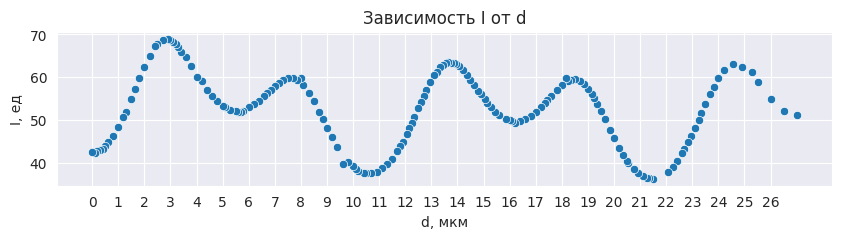

In [26]:
# Increase the size of the plot
plt.figure(figsize=(10, 2))
# Decrease axis step
plt.xticks(np.arange(dataframe['d'].min(), dataframe['d'].max(), 1))
# Plot the data (points plot)
sns.scatterplot(data=dataframe, x='d', y='I')
plt.title('Зависимость I от d')
plt.xlabel('d, мкм') # TODO
plt.ylabel('I, ед')

In [27]:
plotly.express.scatter(dataframe, x='d', y='I')

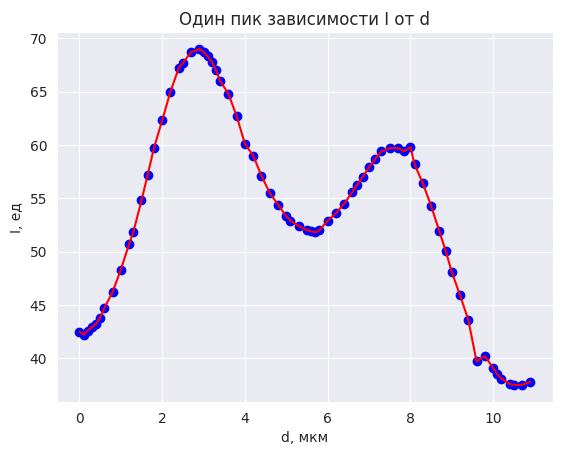

In [28]:
one_pic = dataframe[dataframe['d'] < 11]

# Строим scatterplot
plt.scatter(one_pic['d'], one_pic['I'], color='blue')

# Строим plot I от d
plt.plot(one_pic['d'], one_pic['I'], color='red')

# Добавляем заголовок и подписи осей
plt.title('Один пик зависимости I от d')
plt.xlabel('d, мкм') # TODO
plt.ylabel('I, ед')

# Отображаем график
plt.show()

In [29]:
d_maximums = [2.9, 13.75, 24.6]
wave_lambda = 2 # 2 мм
avg_delta_maximum_d = np.mean(np.diff(d_maximums))
avg_delta_maximum_d

10.850000000000001

In [30]:
wave_lambda/2/avg_delta_maximum_d

0.09216589861751151

In [31]:
contrast = (dataframe['I'].max() / dataframe['I'].min())
print(f"Contrast {contrast}")
n = symbols('n') # n - переменная
R = symbols("R")
R = solve(contrast - (1 + R)**2/(1-R)** 2, R)[0]
print(f"R = {R}")
print(f"n = {solve(R - (n - 1)**2/(n+1)**2, n)}")


Contrast 1.9060773480662982
R = 0.159878344032364
n = [0.428726648370674, 2.33248855372155]


In [32]:
data_attenuator = """25	58.8
24.8	58.85
24.6	58.9
24.4	58.8
24.2	58.5
24	57.4
23.8	55.7
23.6	53.5
23	44.8
22.5	38.4
22.4	37.4
22.2	35.6
22	34.2
21.8	33.2
21.6	32.6
21.4	32.3
21.2	32.3
21	32.6
20.8	33.3
20.6	34.3
20.4	35.6
20.2	37.2
20	39.2
19.5	44.6
19	49.4
18.8	50.7
18.6	51.7
18.4	52.2
18.2	52
18	51.6
17.8	50.8
17.6	49.7
17.4	48.6
17.2	47.4
17	46.2
16.5	44.5
16	44.6
15.8	45.1
15.6	45.6
15.4	46.5
15.2	47.8
15	49.4
14.5	53
14.2	55.2
14	56.3
13.8	57.3
13.6	57.6
13.4	57.2
13.2	56.4
13	54.8
12.5	48.6
12	41.1
11.5	35.3
11.4	34.6
11.2	33.3
11	32.4
10.8	31.5
10.6	31.3
10.4	31.2
10.2	31.7
10	32.3
9.5	35.3
9	40.2
8.8	42.6
8.6	44.6
8.4	46.8
8.2	48.9
8	50.7
7.8	51.8
7.6	52.5
7.4	52.5
7	51.5
6.8	50.5
6.6	49.5
6.4	48.3
6.2	47.4
6	46.7
5.8	46.1
5.6	45.8
5.4	45.8
5.2	46.1
5	46.7
4.8	47.6
4.6	48.7
4.4	50
4.2	51.6
4	53.3
3.5	57.8
3	61
2.8	61.5
2.6	61.5
2.4	60.9
2.2	59.4
2	57.3
1.5	50.5
1	43.6
0.5	38.3
0.4	37.4
0.2	36.6
0	36.3""".replace(",", ".").replace(" ", "\t")
dataframe_new = pd.DataFrame([x.split('\t') for x in data_attenuator.split('\n')], columns=['d', 'I'])
dataframe_new['d'] = dataframe_new['d'].astype(float)
dataframe_new['I'] = dataframe_new['I'].astype(float)
dataframe_new

,d,I
0,25.0,58.80
1,24.8,58.85
2,24.6,58.90
3,24.4,58.80
4,24.2,58.50
...,...,...
95,1.0,43.60
96,0.5,38.30
97,0.4,37.40
98,0.2,36.60


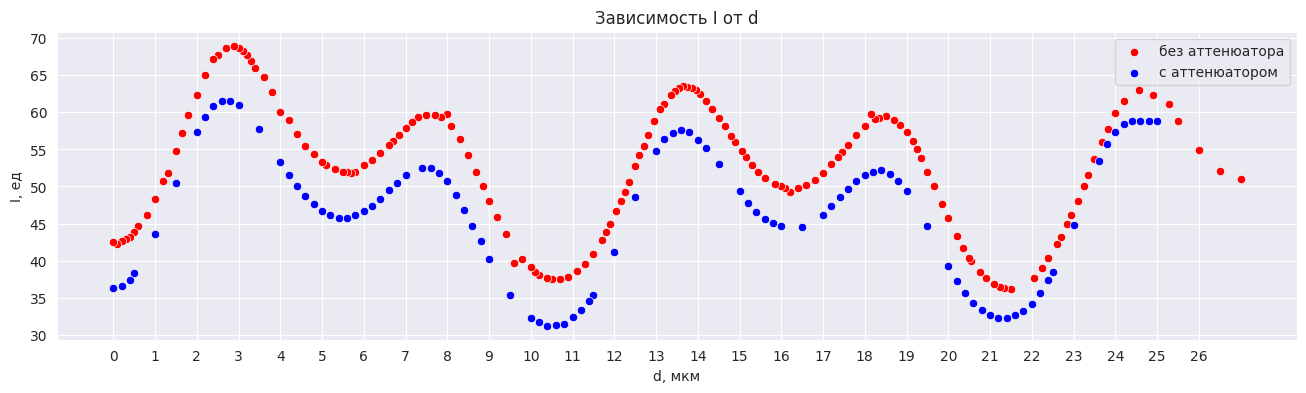

In [38]:
# Сравни I(d) для dataframe и dataframe_new, построив один график
plt.figure(figsize=(16, 4))
plt.xticks(np.arange(dataframe['d'].min(), dataframe['d'].max(), 1))
sns.scatterplot(data=dataframe, x='d', y='I', color='red')
sns.scatterplot(data=dataframe_new, x='d', y='I', color='blue')
plt.title('Зависимость I от d')
plt.xlabel('d, мкм') # TODO
plt.ylabel('I, ед')
plt.legend(['без аттенюатора', 'с аттенюатором'])

